In [363]:
library(dplyr)
library(ggplot2)

In [364]:
install.packages("zoo")

Warning message:
"pakiet 'zoo' jest w użyciu i nie zostanie zainstalowany"


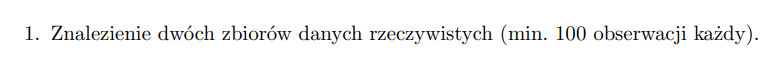

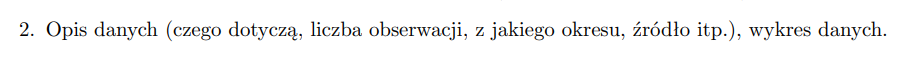

dane: https://www.kaggle.com/datasets/loveall/appliances-energy-prediction

T1, Temperature in kitchen area, in Celsius <br>
T5, Temperature in bathroom, in Celsius

In [365]:
p <- read.csv('KAG_energydata_complete.csv', header=TRUE)
p <- na.omit(p)

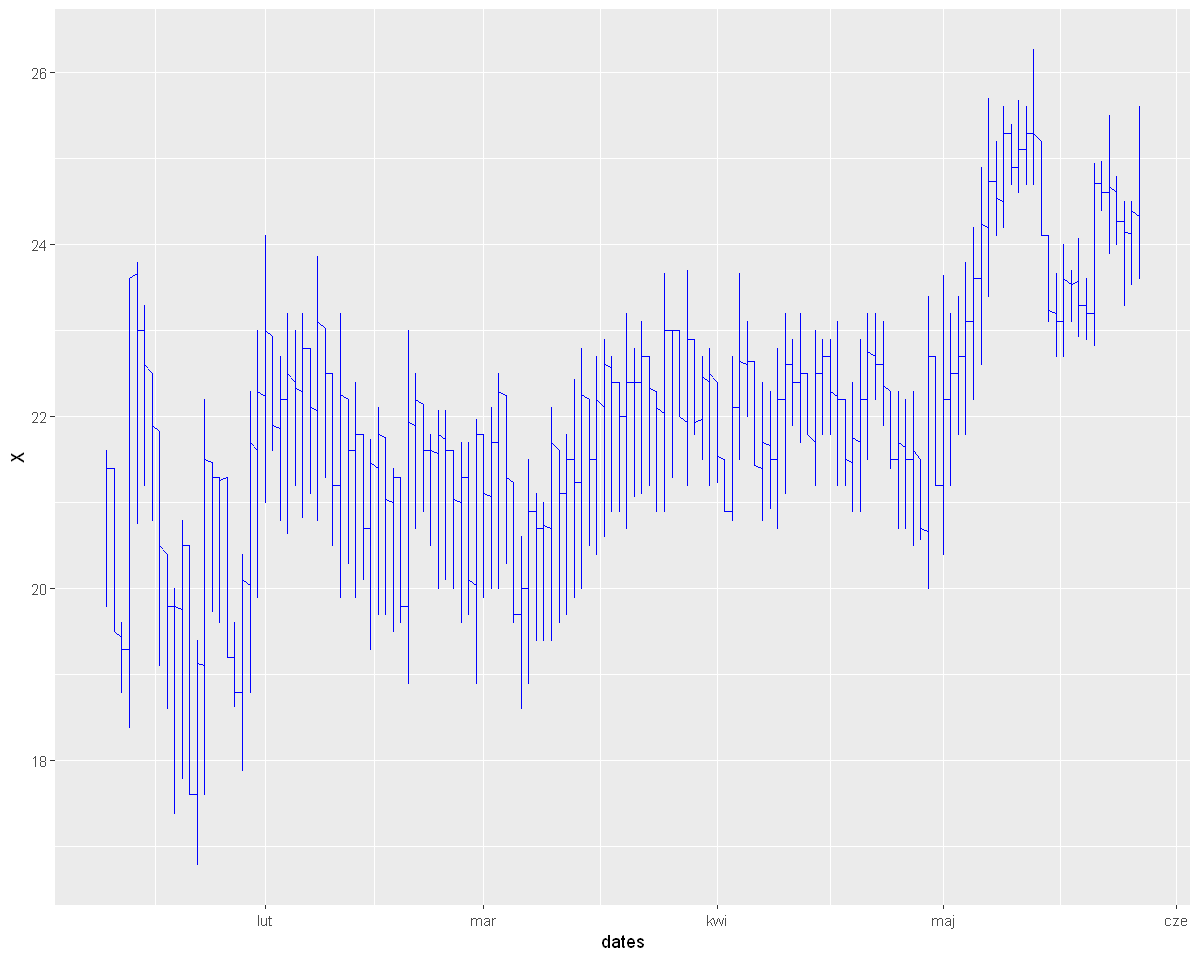

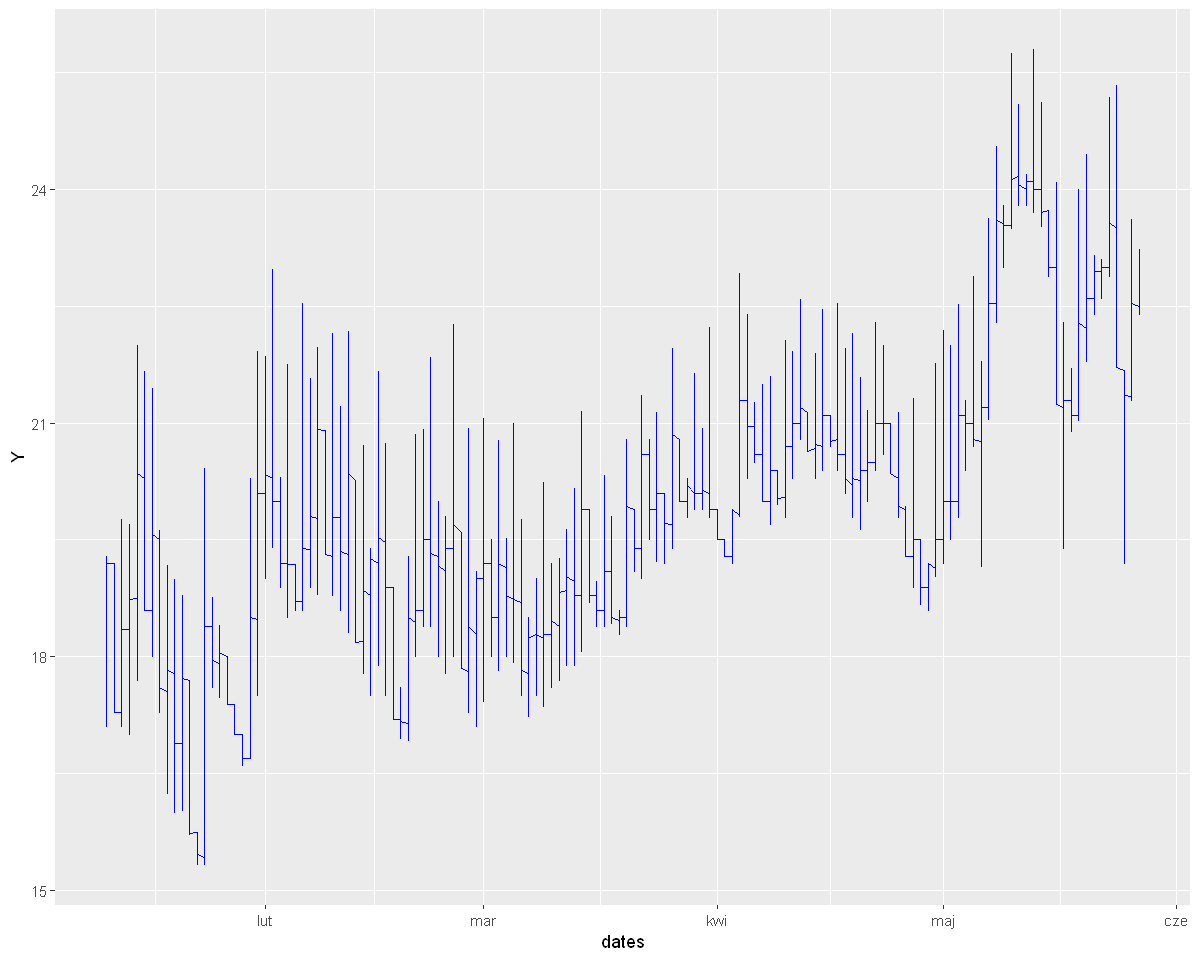

In [366]:
#head(p)
X <- p$T1
Y <- p$T5
dates <- as.Date(p$date)
p1 <- ggplot() + geom_line(aes(dates, X), color = "blue")
p2 <- ggplot() + geom_line(aes(dates, Y), color = "blue")
ggsave(plot = p1, width = 10, height = 8, dpi = 300, filename = "X.jpg")
ggsave(plot = p2, width = 10, height = 8, dpi = 300, filename = "Y.jpg")
p1
p2

In [367]:
cor(p[,4:21])

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9
T1,1.000000000,0.16400579,0.83683399,-0.002508849,0.89240229,-0.02855022,0.87700106,0.09786124,0.88524687,-0.01478188,0.654768730,-0.6150449,0.83870503,0.13518236,0.82541331,-0.006441297,0.844776610,0.071755608
RH_1,0.164005789,1.00000000,0.26983924,0.797535428,0.25322995,0.84467692,0.10617954,0.88035854,0.20579699,0.30325825,0.316141287,0.2451262,0.02139703,0.80112213,-0.03005303,0.736195903,0.115263350,0.764001237
T2,0.836833990,0.26983924,1.00000000,-0.165610042,0.73524547,0.12149667,0.76206605,0.23156287,0.72055019,0.02959520,0.801186048,-0.5803718,0.66366009,0.22921190,0.57819084,0.068534184,0.675534594,0.157346305
RH_2,-0.002508849,0.79753543,-0.16561004,1.000000000,0.13731871,0.67832638,-0.04730410,0.72143511,0.11040933,0.25027068,-0.009670312,0.3899330,-0.05142184,0.69058432,-0.04102325,0.679777214,0.054544427,0.676466805
T3,0.892402285,0.25322995,0.73524547,0.137318707,1.00000000,-0.01123389,0.85277773,0.12273738,0.88816891,-0.06635522,0.686882480,-0.6476722,0.84737415,0.17262397,0.79528349,0.044426782,0.901323585,0.134602147
RH_3,-0.028550221,0.84467692,0.12149667,0.678326381,-0.01123389,1.00000000,-0.14045724,0.89897829,-0.05006247,0.37542217,0.076833025,0.5149121,-0.25009047,0.83268499,-0.28322803,0.828821898,-0.195269715,0.833537966
T4,0.877001062,0.10617954,0.76206605,-0.047304098,0.85277773,-0.14045724,1.00000000,-0.04865036,0.87181348,-0.07648930,0.652349697,-0.7031486,0.87776288,0.04352678,0.79625585,-0.095192170,0.889439151,-0.025548994
RH_4,0.097861237,0.88035854,0.23156287,0.721435114,0.12273738,0.89897829,-0.04865036,1.00000000,0.09181192,0.35259097,0.259047240,0.3921777,-0.13120361,0.89430125,-0.16706635,0.847259038,-0.044517584,0.856591085
T5,0.885246873,0.20579699,0.72055019,0.110409333,0.88816891,-0.05006247,0.87181348,0.09181192,1.00000000,0.03278556,0.629160610,-0.6323838,0.87062420,0.14890541,0.82498060,0.016387517,0.911055118,0.072307899
RH_5,-0.014781878,0.30325825,0.02959520,0.250270682,-0.06635522,0.37542217,-0.07648930,0.35259097,0.03278556,1.00000000,-0.078337161,0.2637965,-0.14282334,0.32580758,-0.08699061,0.359839637,-0.138508973,0.272197101


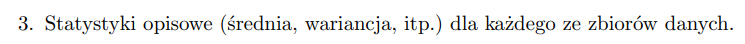

### X

In [368]:
n <- length(X)

In [369]:
##średnia 
mean(X)
sum(X)/n

[1] 21.68657

[1] 21.68657

In [370]:
## wariancja
var(X)
sum((X-mean(X))^2)/(n-1)

[1] 2.579447

[1] 2.579447

In [371]:
#odchylenie
sqrt(var(X))

[1] 1.606066

In [372]:
## mediana 
n
median(X)
sort(X)[ceiling(n/2)]

[1] 19735

[1] 21.6

[1] 21.6

In [373]:
### kwantyle
Q <- quantile(X, c(0.25, 0.5, 0.75))
Q

25%   50%   75% 
20.76 21.60 22.60

In [374]:
df <- data.frame(x = density(X)$x, y = density(X)$y)
length(df$x)

[1] 512

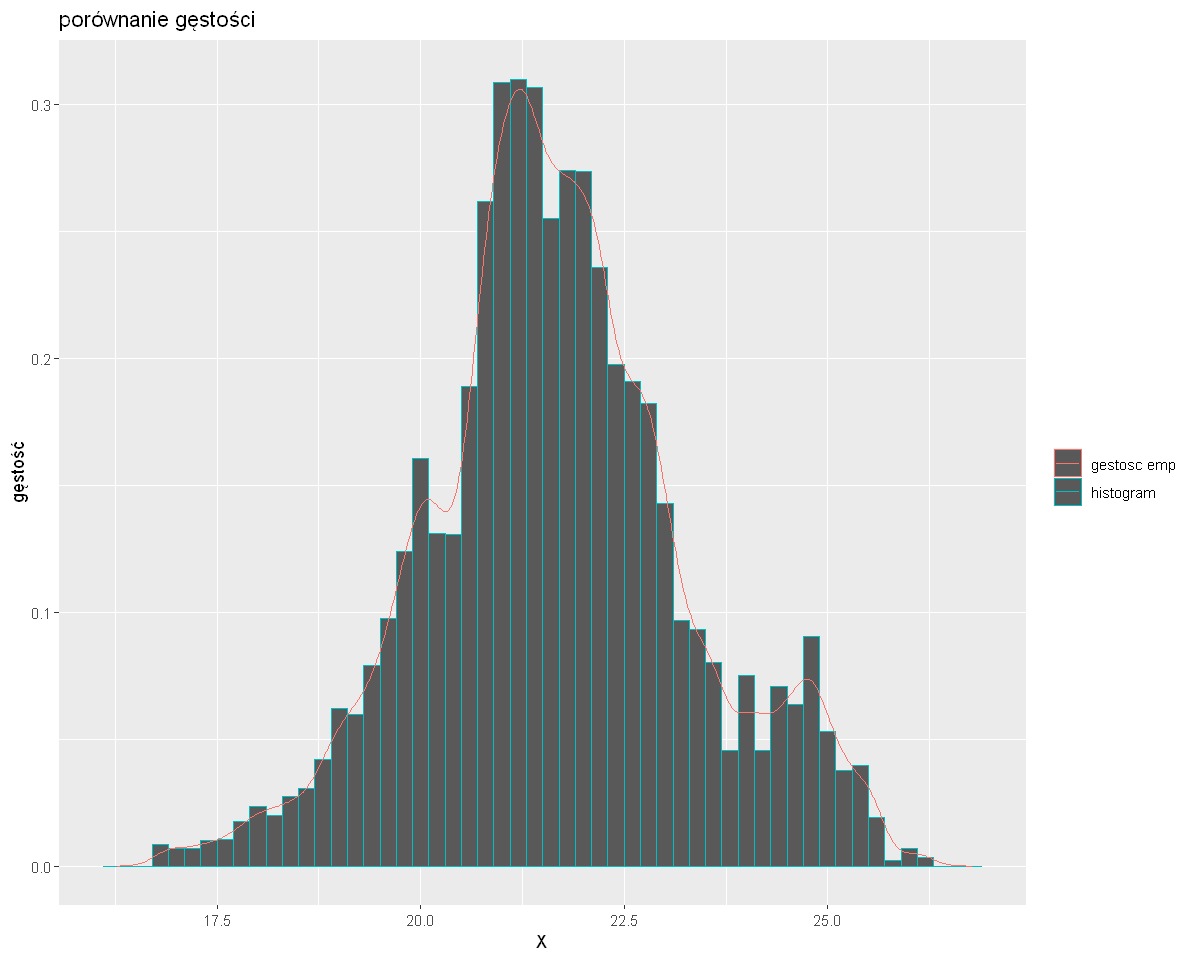

In [375]:
##wykresy
#hist(X, col='skyblue', main='Dane Y',freq=FALSE,  ylim = c(0,0.7), breaks=70)
#lines(density(X), col = "red")
ggplot() + geom_histogram(aes(x = X, y = ..density.., color="histogram"), binwidth=0.2) +
geom_line(aes(x = df$x, y = df$y, color="gestosc emp")) + ylab("gęstość") + ggtitle("porównanie gęstości") +  
theme(legend.title = element_blank()) 

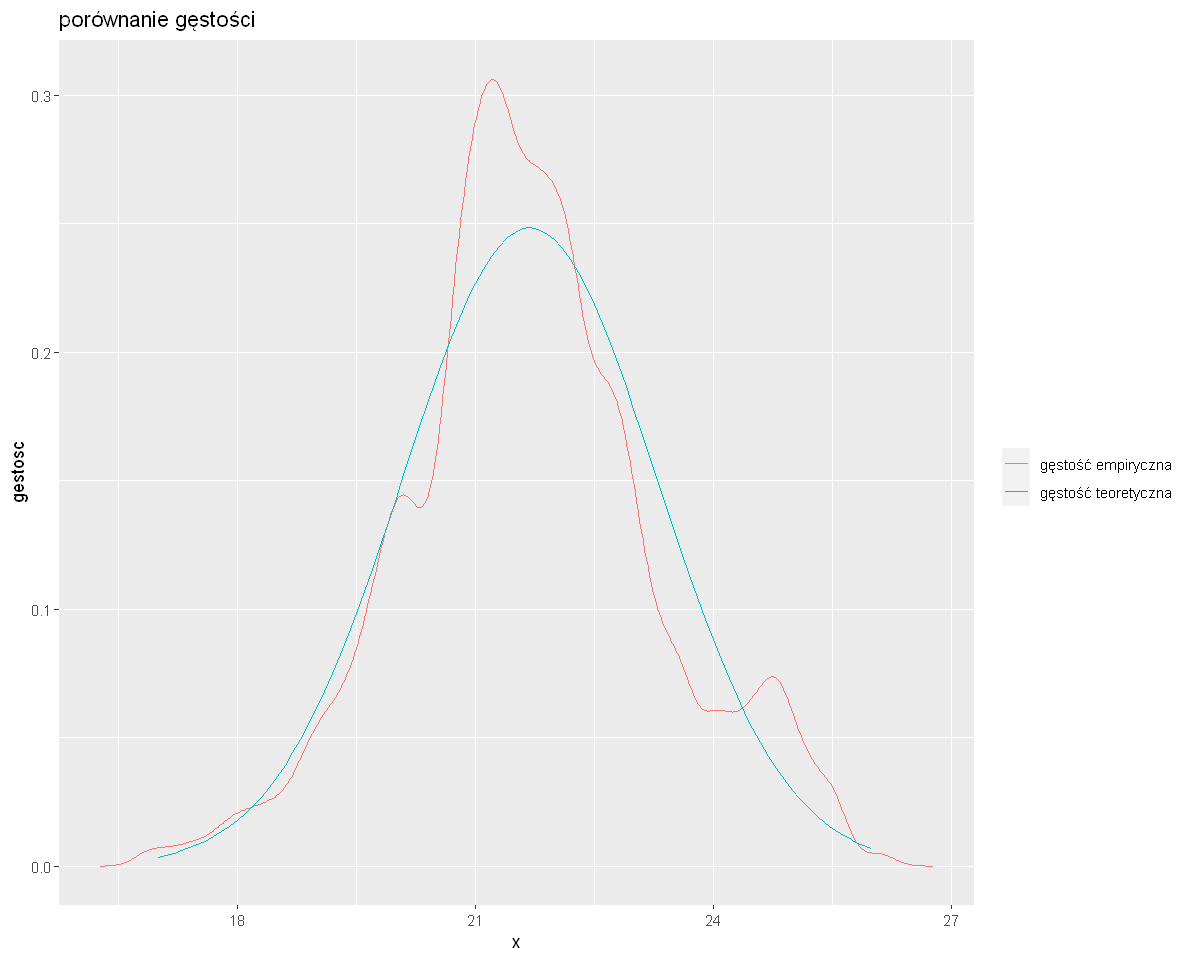

In [376]:
ggplot() + geom_line(aes(x = df$x, y = df$y, color='gęstość empiryczna')) + 
geom_line(aes(x=seq(17,26,0.1), y = dnorm(seq(17,26,0.1), mean(X), sqrt(var(X))), color="gęstość teoretyczna")) +
xlab("x") + ylab("gestosc")  +  theme(legend.title = element_blank()) + ggtitle("porównanie gęstości")

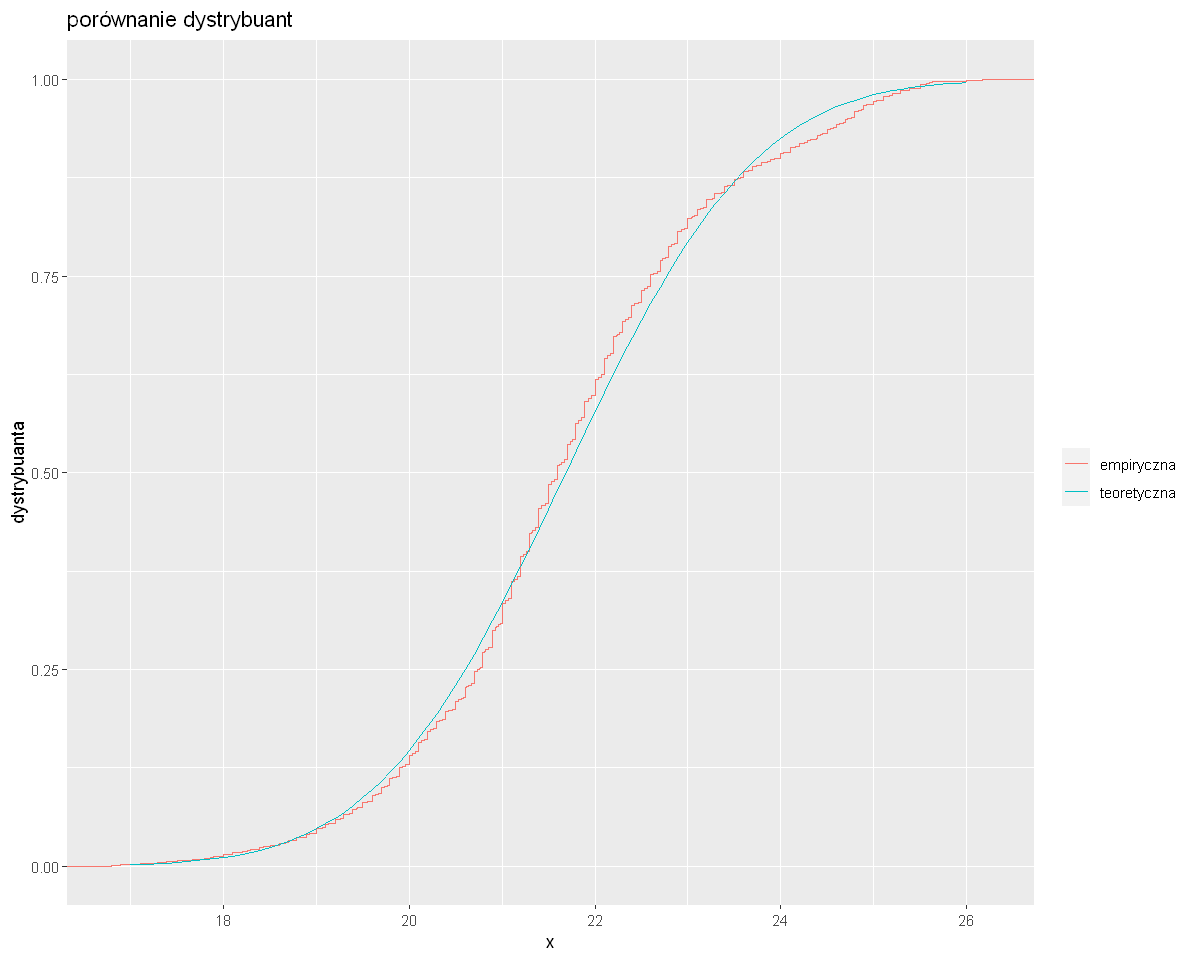

In [377]:
ggplot() + stat_ecdf(aes(X, color="empiryczna")) +
geom_line(aes(x=seq(17,26,0.1), y = pnorm(seq(17,26,0.1), mean(X), sqrt(var(X))), color="teoretyczna"))+
xlab("x") + ylab("dystrybuanta")  +  theme(legend.title = element_blank()) + ggtitle("porównanie dystrybuant") +
theme(legend.title = element_blank()) 

## Y

In [378]:
##średnia 
mean(Y)
sum(Y)/n

[1] 19.59211

[1] 19.59211

In [379]:
var(Y)
sum((Y-mean(Y))^2)/(n-1)

[1] 3.402635

[1] 3.402635

In [380]:
#odchylenie
sqrt(var(Y))

[1] 1.844623

In [381]:
## mediana 
n
median(Y)
sort(Y)[ceiling(n/2)]

[1] 19735

[1] 19.39

[1] 19.39

In [382]:
### kwantyle
Q <- quantile(Y, c(0.25, 0.5, 0.75))
Q

25%      50%      75% 
18.27750 19.39000 20.61964

In [383]:
df <- data.frame(x = density(Y)$x, y = density(Y)$y)
length(df$x)

[1] 512

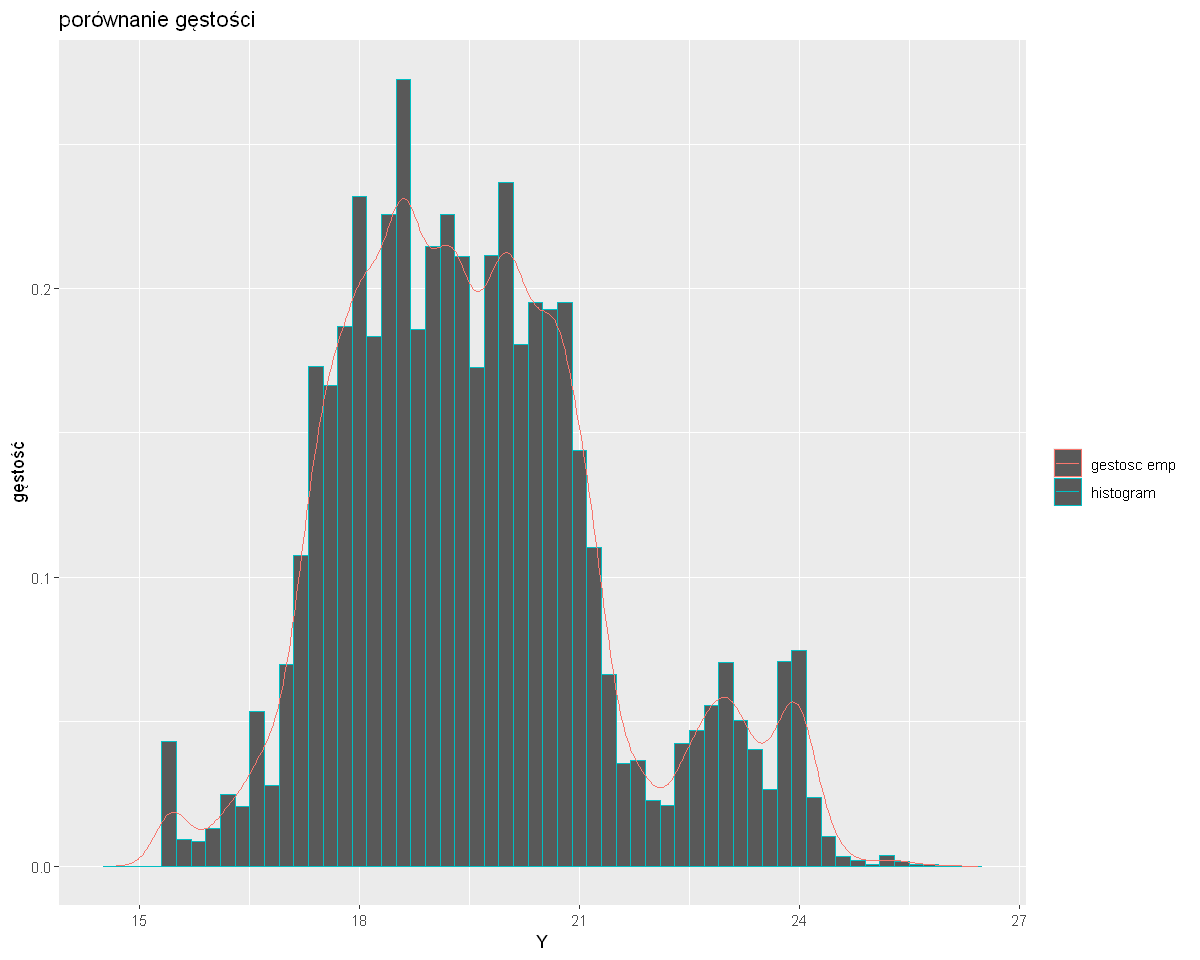

In [384]:
ggplot() + geom_histogram(aes(x = Y, y = ..density.., color="histogram"), binwidth=0.2) +
geom_line(aes(x = df$x, y = df$y, color="gestosc emp")) + ylab("gęstość") + ggtitle("porównanie gęstości") +  
theme(legend.title = element_blank()) 

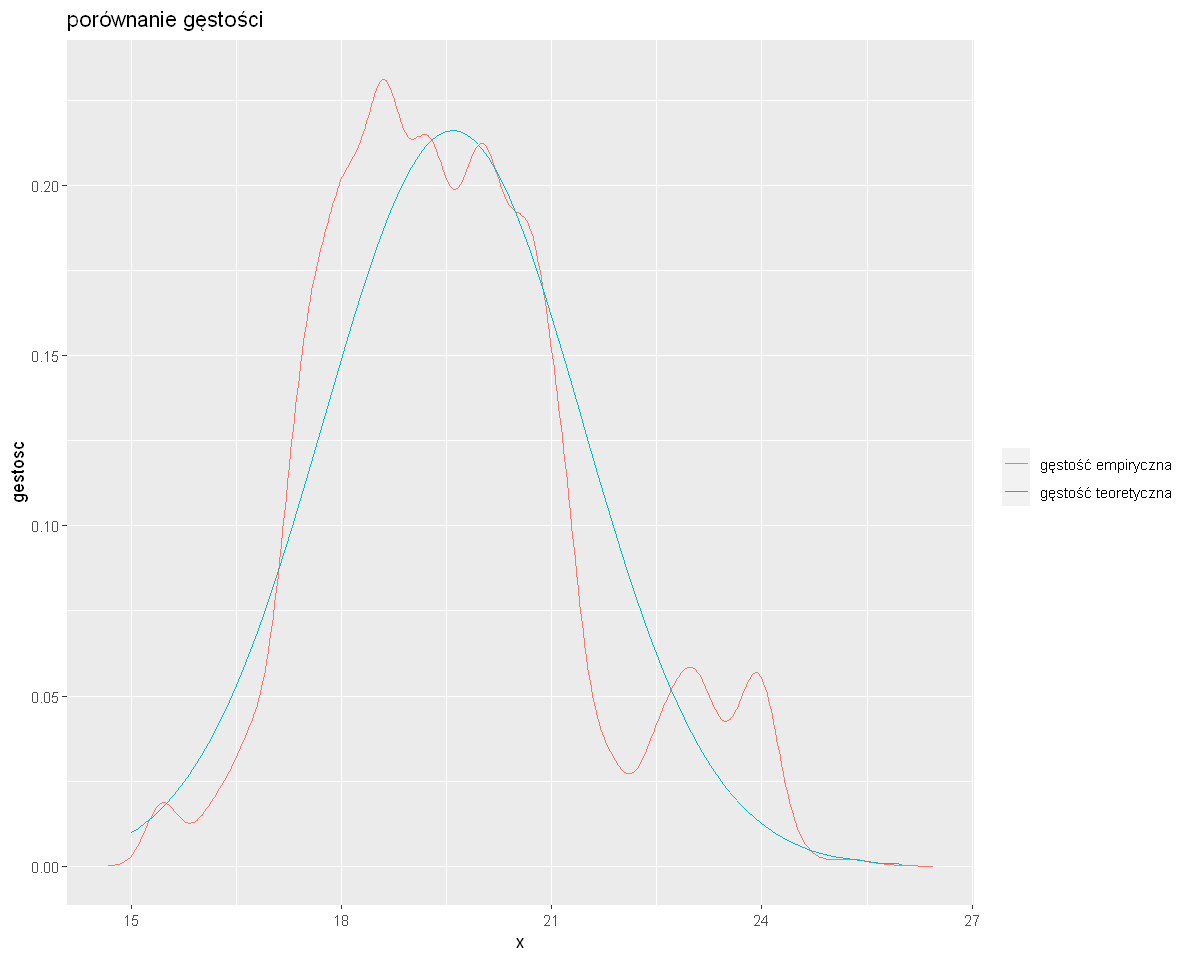

In [385]:
ggplot() + geom_line(aes(x = df$x, y = df$y, color='gęstość empiryczna')) + 
geom_line(aes(x=seq(15,26,0.1), y = dnorm(seq(15,26,0.1), mean(Y), sqrt(var(Y))), color="gęstość teoretyczna")) +
xlab("x") + ylab("gestosc")  +  theme(legend.title = element_blank()) + ggtitle("porównanie gęstości")

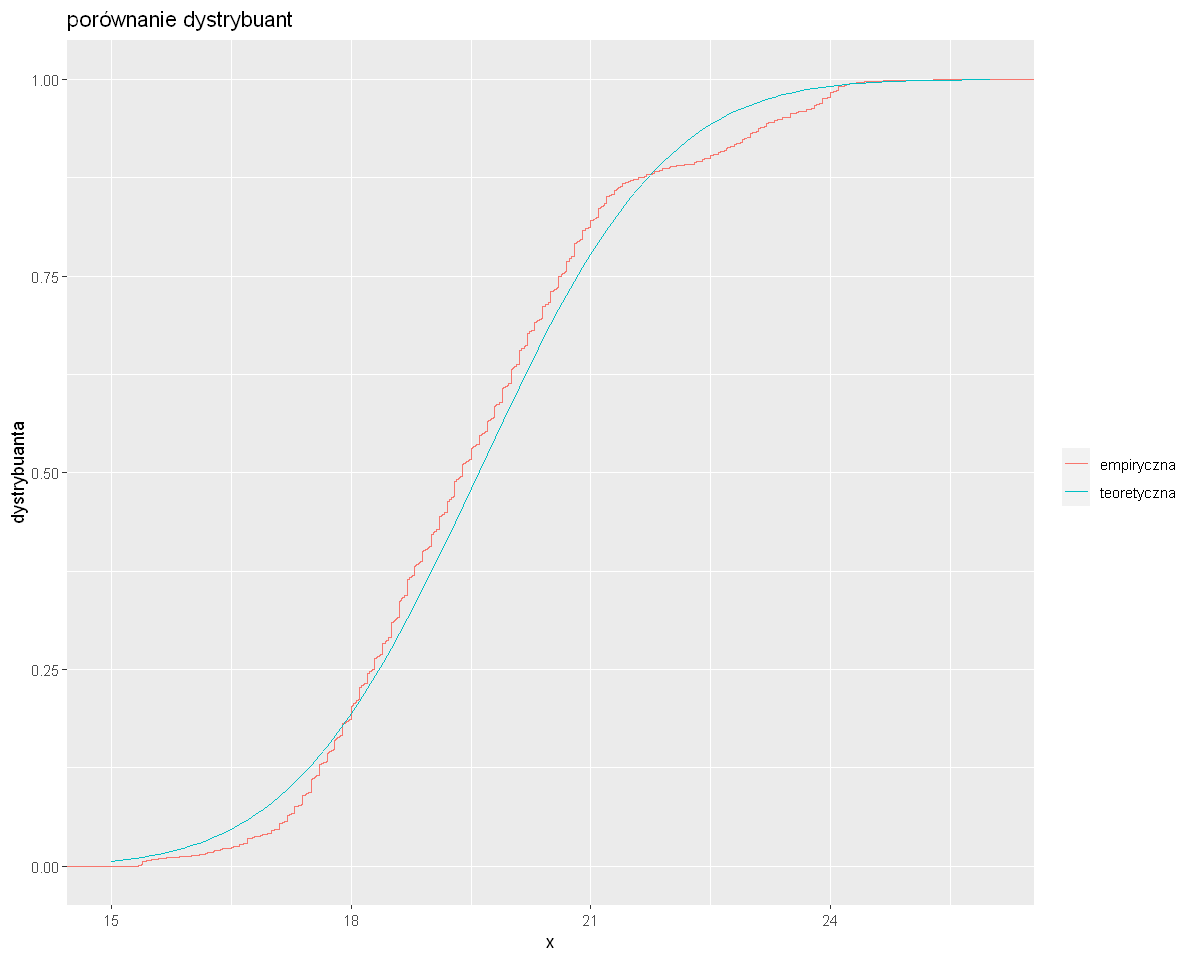

In [386]:
##można się pobawić i znaleźć w tym jakieś dwa normalne ale czy jest sens to watpie XD W każdym razie przypomina troche 
##jakiś rozkład dwumodalny
ggplot() + stat_ecdf(aes(Y, color="empiryczna")) +
geom_line(aes(x=seq(15,26,0.1), y = pnorm(seq(15,26,0.1), mean(Y), sqrt(var(Y))), color="teoretyczna"))+
xlab("x") + ylab("dystrybuanta")  +  theme(legend.title = element_blank()) + ggtitle("porównanie dystrybuant") +
theme(legend.title = element_blank()) 

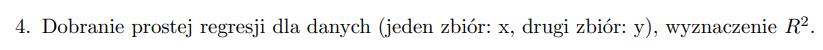

[1] 0.8852469

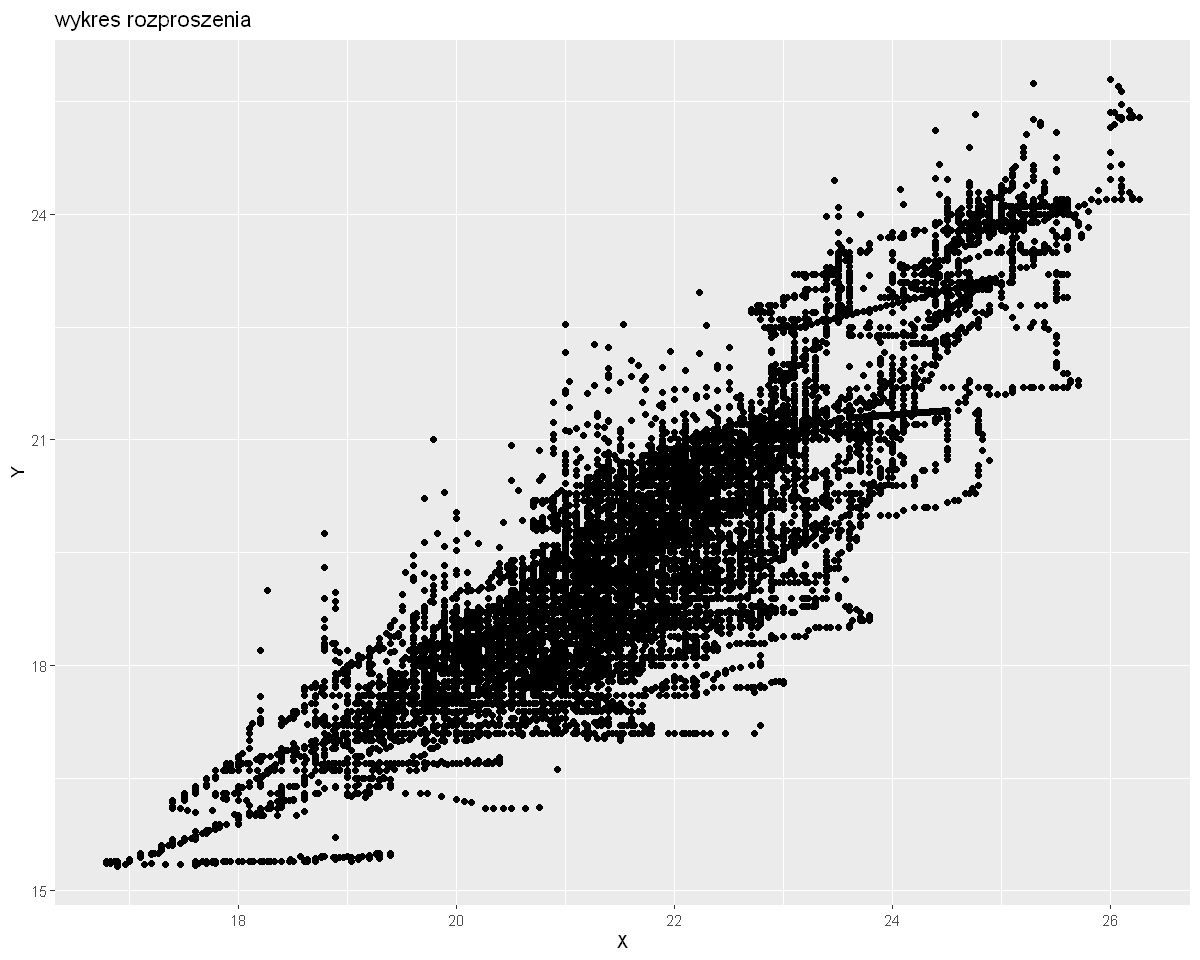

In [387]:
##wykres rozproszenia
ggplot() + geom_point(aes(p$T1, p$T5)) + labs(x="X", y= 'Y') + ggtitle("wykres rozproszenia")
cor(p$T5, p$T1)

In [388]:
##funkcja do liczenia współczynników prostej regresji liniowej

wsp <- function(dx, dy) {
    xs <- mean(dx)
    ys <- mean(dy)
    b1 <- sum((dx-xs)*dy)/sum((dx-xs)^2)
    b0 <- ys - b1*xs
    
    return(c(b0,b1))
}

In [389]:
w <- wsp(X,Y)
b0 <- w[1]
b1 <- w[2]
ys <- b0 + b1*X
prosta <- paste("y = ", round(b0,4), "+", round(b1,4), "x")

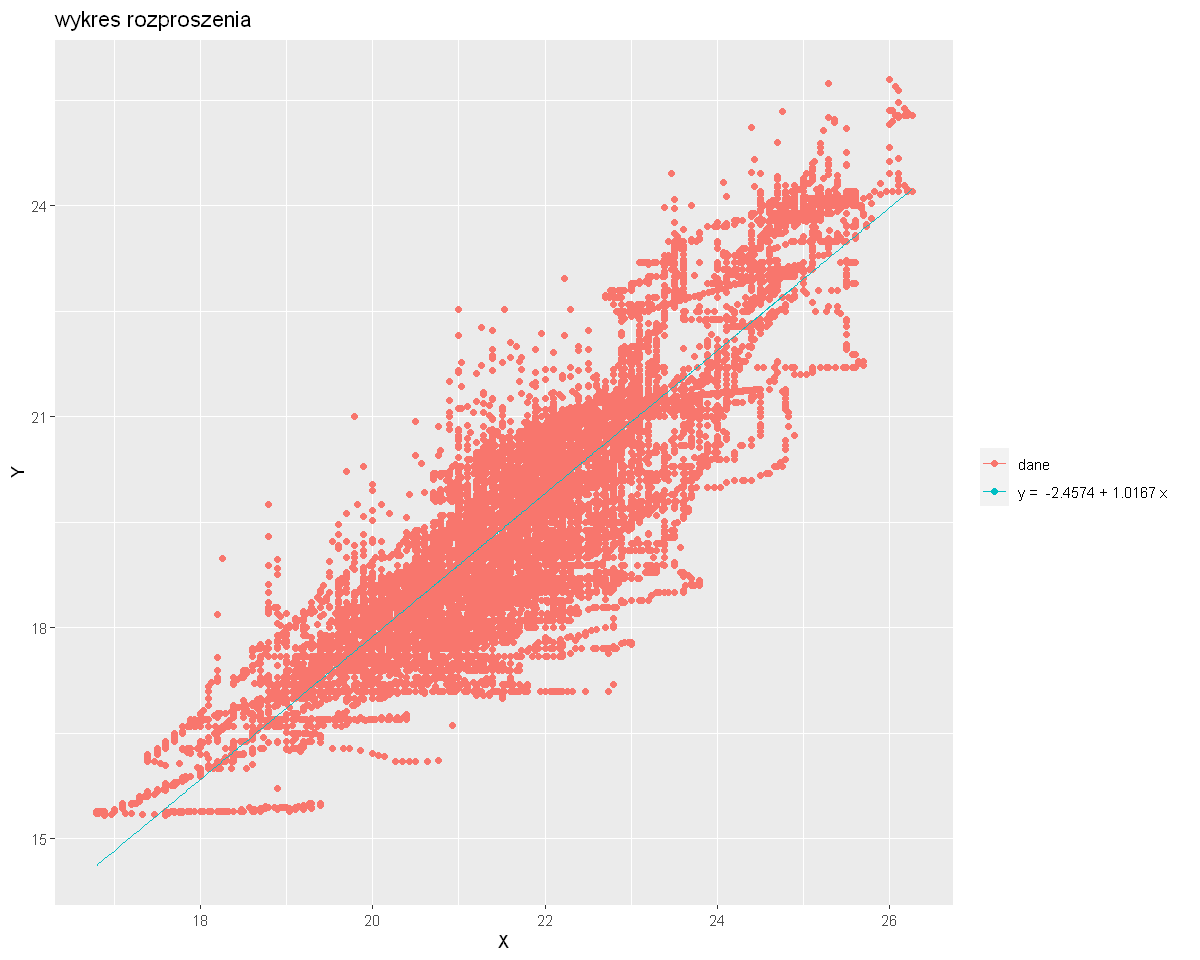

In [390]:
ggplot() + geom_point(aes(p$T1, p$T5, color="dane")) + geom_line(aes(X, ys, color=prosta)) +
labs(x="X", y= 'Y') + ggtitle("wykres rozproszenia") +  theme(legend.title = element_blank())

### $R^2 = \frac{SSR}{SST} = \frac{\sum(\hat{y_i} - \bar{y})^2}{\sum(y_i - \bar{y})^2}$ 

In [391]:
SSR <- sum((ys - mean(Y))^2)
SST <- sum((Y - mean(Y))^2)
SSE <- sum((Y - ys)^2)
SSE + SSR
SST

[1] 67147.6

[1] 67147.6

In [392]:
##R2 = 
SSR/SST

[1] 0.783662

In [393]:
df <- data.frame(X,Y)
model <- lm(Y~X, data=df)

In [394]:
summary(model)


Call:
lm(formula = Y ~ X, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5530 -0.5006  0.0948  0.5578  3.6387 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.457442   0.082698  -29.72   <2e-16 ***
X            1.016737   0.003803  267.36   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.858 on 19733 degrees of freedom
Multiple R-squared:  0.7837,	Adjusted R-squared:  0.7837 
F-statistic: 7.148e+04 on 1 and 19733 DF,  p-value: < 2.2e-16


In [395]:
prosta

[1] "y =  -2.4574 + 1.0167 x"

In [396]:
model$coefficients
summary(model)$r.squared

(Intercept)           X 
  -2.457442    1.016737

[1] 0.783662

yay wyszło dobrzee

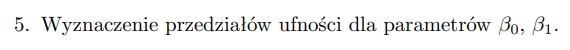

In [397]:
a <- 0.05
B0 <- b0
B1 <- b1
s_val <- sqrt(sum((Y - B0 - B1*X)^2)/(n-2)) 

b0_d <- B0 - qt(1-a/2, n-2)*s_val*sqrt(1/n + (mean(X))^2/sum((X-mean(X))^2)) 
b0_g <- B0 + qt(1-a/2, n-2)*s_val*sqrt(1/n + (mean(X))^2/sum((X-mean(X))^2)) 

b1_d <- B1 - qt(1-a/2, n-2)*s_val/sqrt(sum((X-mean(X))^2))
b1_g <- B1 + qt(1-a/2, n-2)*s_val/sqrt(sum((X-mean(X))^2))
b0_d
b0_g

b1_d
b1_g
c(b0,b1)


[1] -2.619536

[1] -2.295347

[1] 1.009283

[1] 1.024191

[1] -2.457442  1.016737

In [398]:
confint(model) 

,2.5 %,97.5 %
(Intercept),-2.619536,-2.295347
X,1.009283,1.024191


też się zgadza łuuu

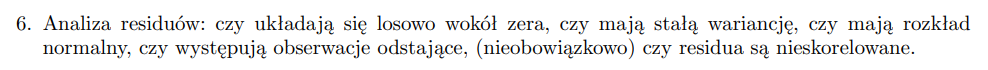

In [399]:
e <- Y - ys 

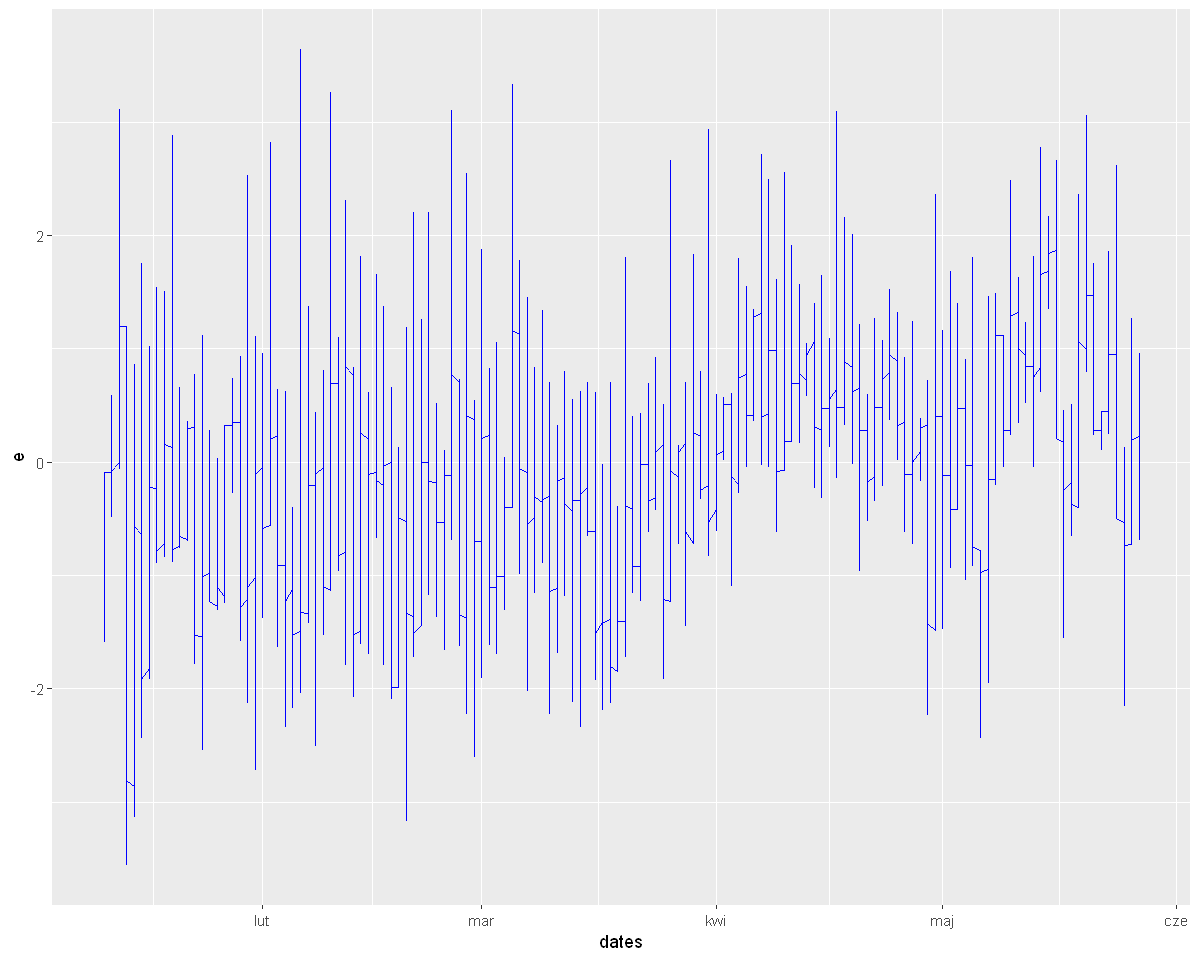

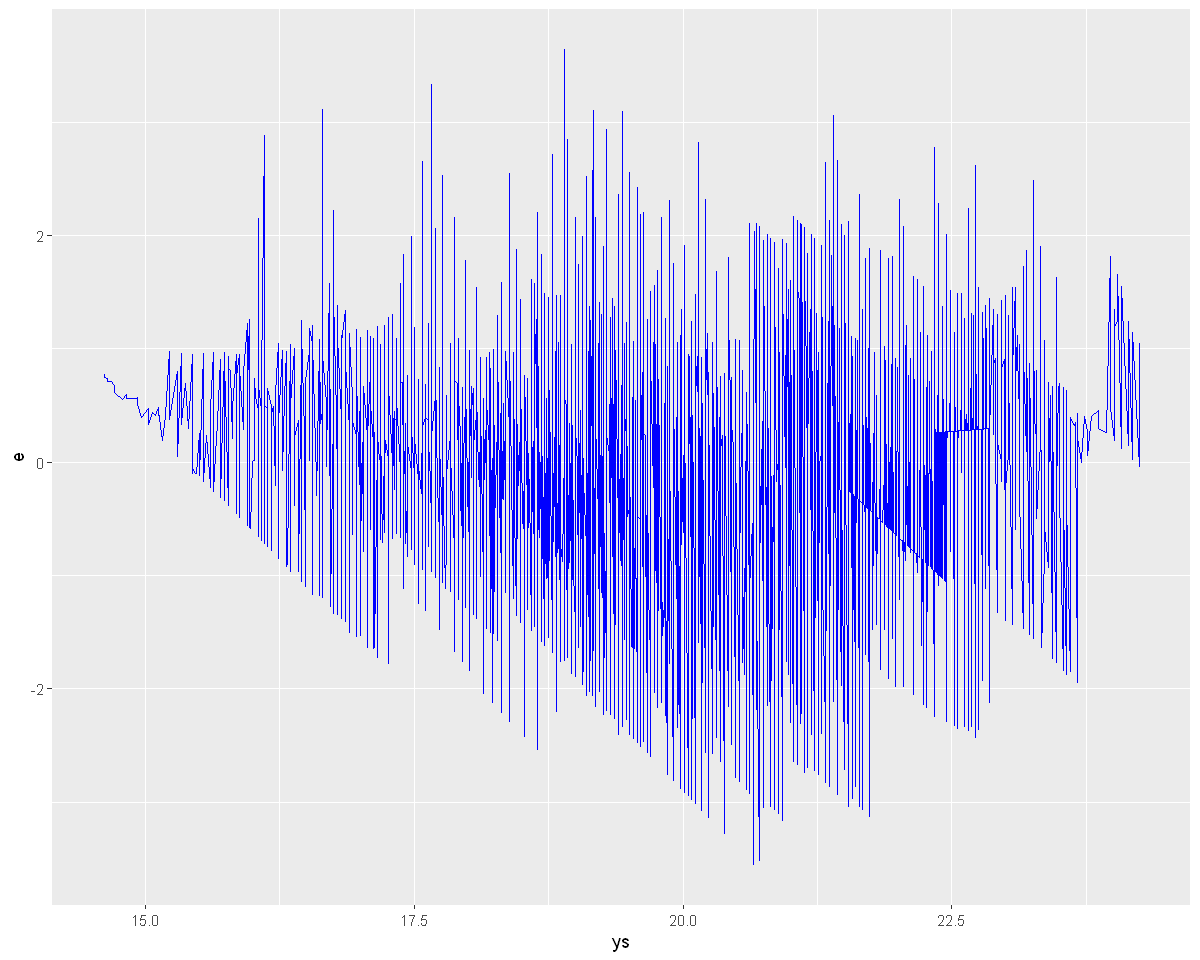

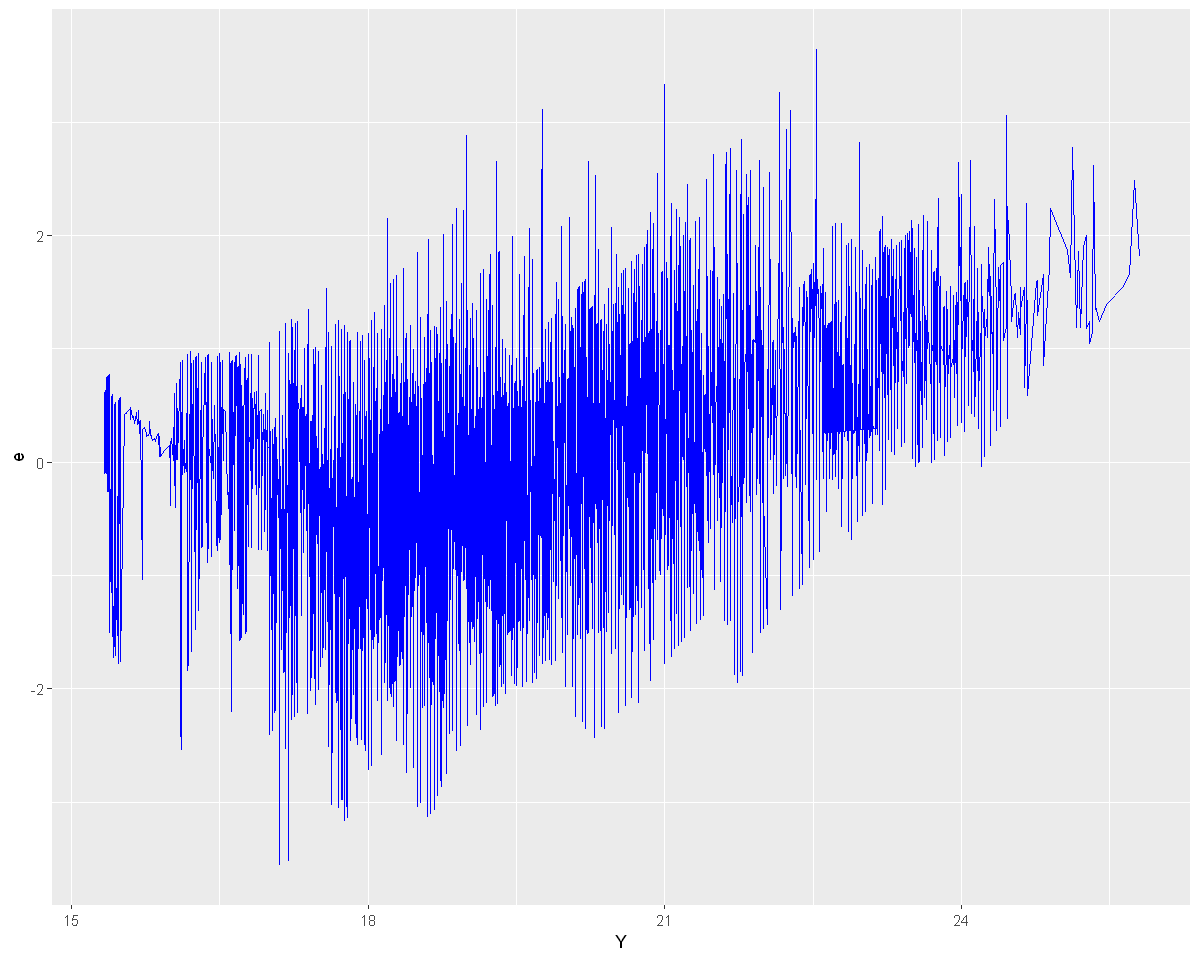

In [400]:
ggplot() + geom_line(aes(dates, e), color = "blue")
ggplot() + geom_line(aes(ys, e), color = "blue")
ggplot() + geom_line(aes(Y, e), color = "blue")

## ŚREDNIA I VAR


In [401]:
##średnia
mean(e)
##wariancja
var(e)

[1] 3.506359e-16

[1] 0.7361192

In [402]:
df <- data.frame(x = density(e)$x, y = density(e)$y)
length(df$x)

[1] 512

## WYKRESY

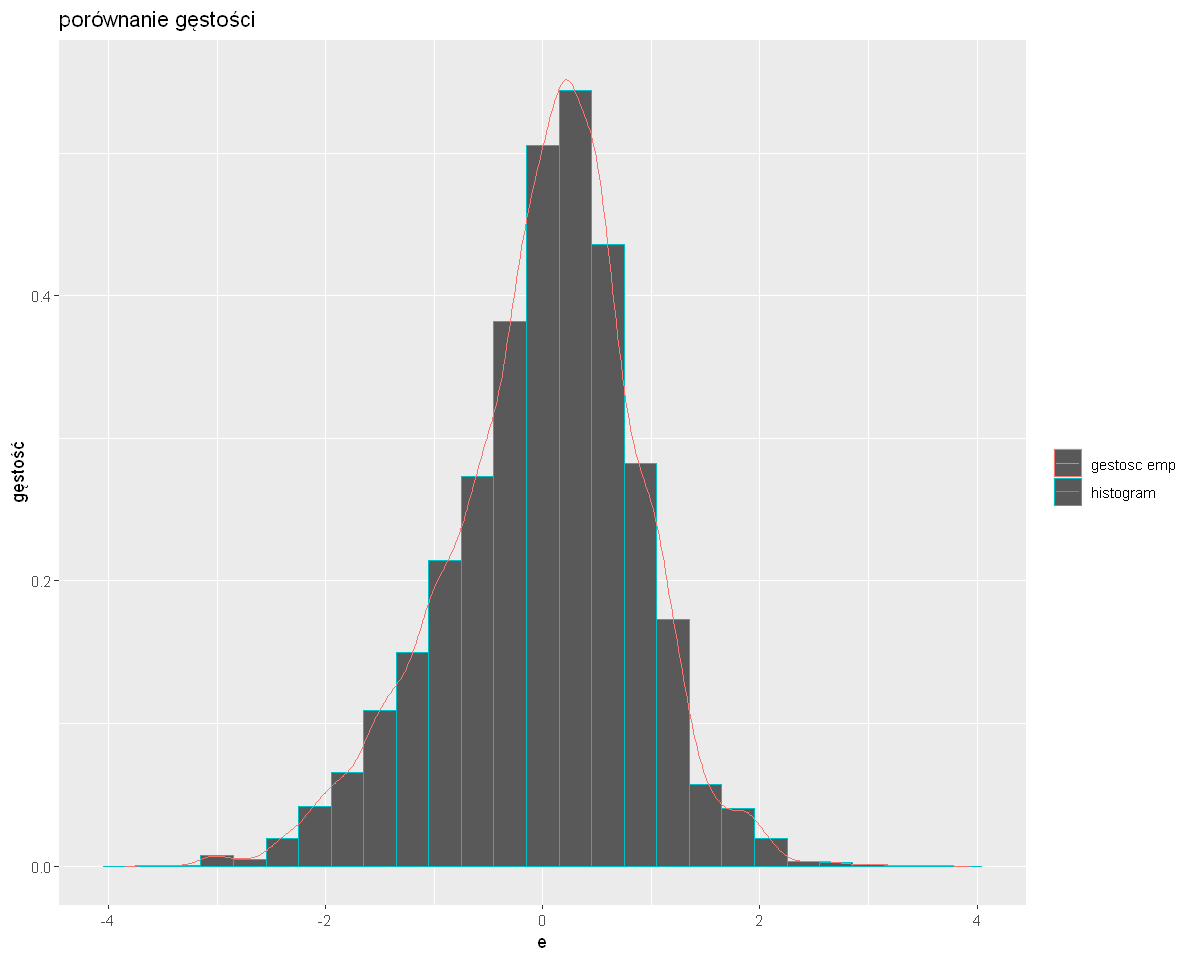

In [403]:
ggplot() + geom_histogram(aes(x = e, y = ..density.., color="histogram"), binwidth=0.3) +
geom_line(aes(x = df$x, y = df$y, color="gestosc emp")) + ylab("gęstość") + ggtitle("porównanie gęstości") +  
theme(legend.title = element_blank()) 

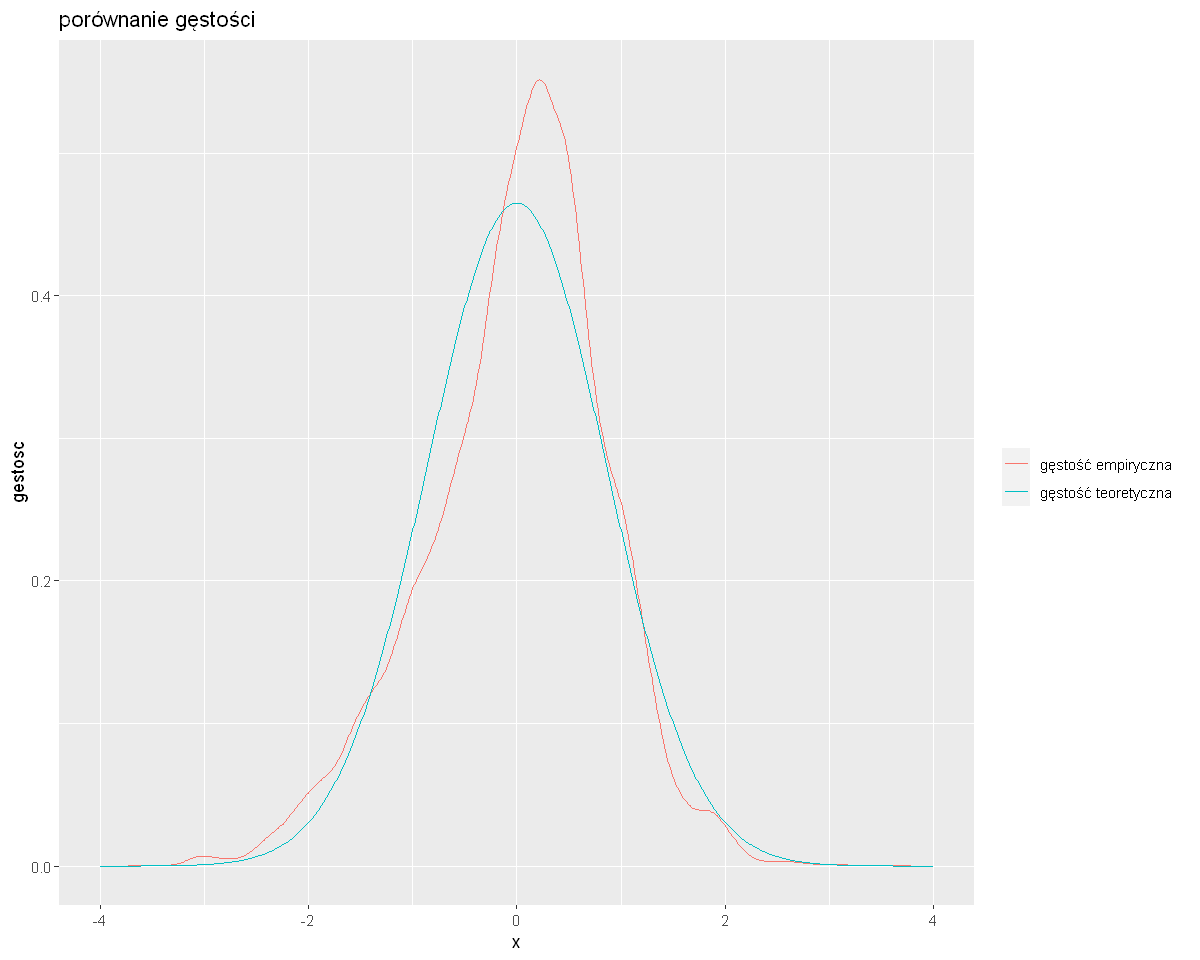

In [404]:
ggplot() + geom_line(aes(x = df$x, y = df$y, color='gęstość empiryczna')) + 
geom_line(aes(x=seq(-4,4,0.01), y = dnorm(seq(-4,4,0.01), mean(e), sqrt(var(e))), color="gęstość teoretyczna")) +
xlab("x") + ylab("gestosc")  +  theme(legend.title = element_blank()) + ggtitle("porównanie gęstości")

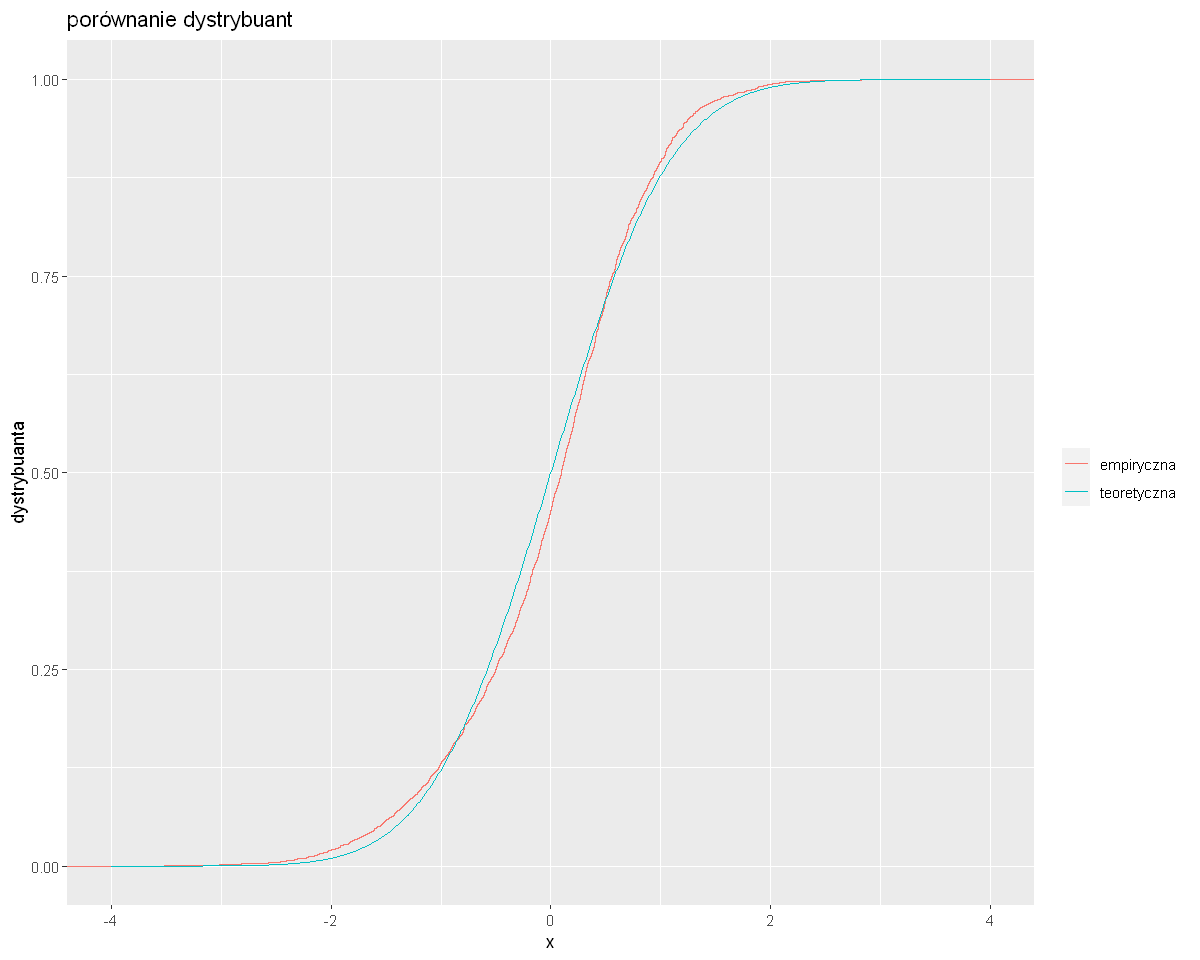

In [405]:
ggplot() + stat_ecdf(aes(e, color="empiryczna")) +
geom_line(aes(x=seq(-4,4,0.01), y = pnorm(seq(-4,4,0.01), mean(e), sqrt(var(e))), color="teoretyczna"))+
xlab("x") + ylab("dystrybuanta")  +  theme(legend.title = element_blank()) + ggtitle("porównanie dystrybuant") +
theme(legend.title = element_blank()) 

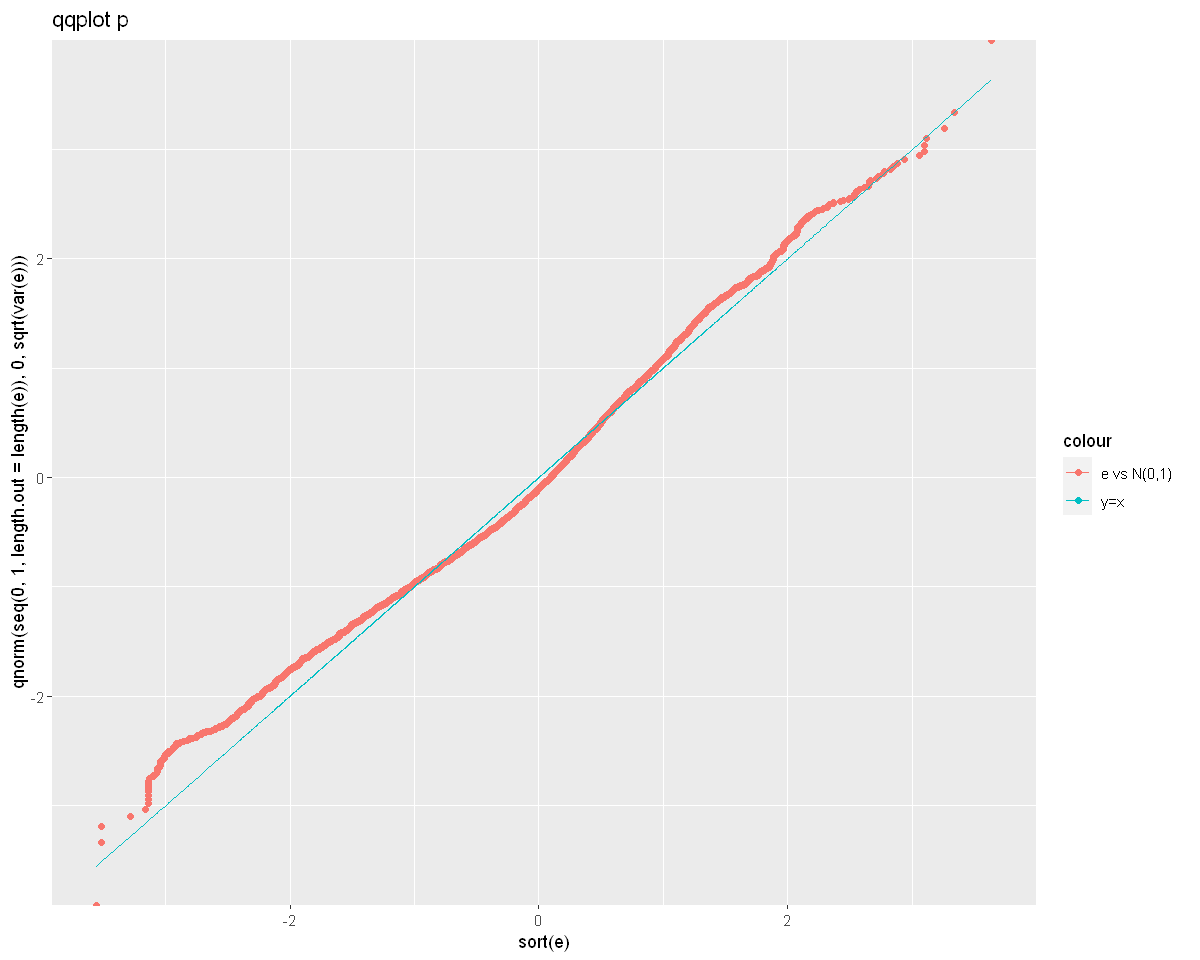

In [406]:
##qqplot
p2 <- ggplot() + 
  geom_point(aes(x= sort(e), y =  qnorm(seq(0,1,length.out = length(e)), 0, sqrt(var(e))), color="e vs N(0,1)")) +
  geom_line(aes(x= e, y = e, color="y=x"))  + ggtitle('qqplot p')
p2


## średnie i wariancje ruchome

In [407]:
ruchoma <- function(dane, m) {
    p <- (m-1)/2
    vals <- c()
    for (k in seq(p+1, length(dane)-p, 1)) {
        tk <- 0
        for (j in seq(-p,p,1)) {
            tk <- tk + dane[k+j]/(2*p+1)
        }
        vals <- append(vals, tk)
    }
    return(vals)
}

In [408]:
library("zoo")


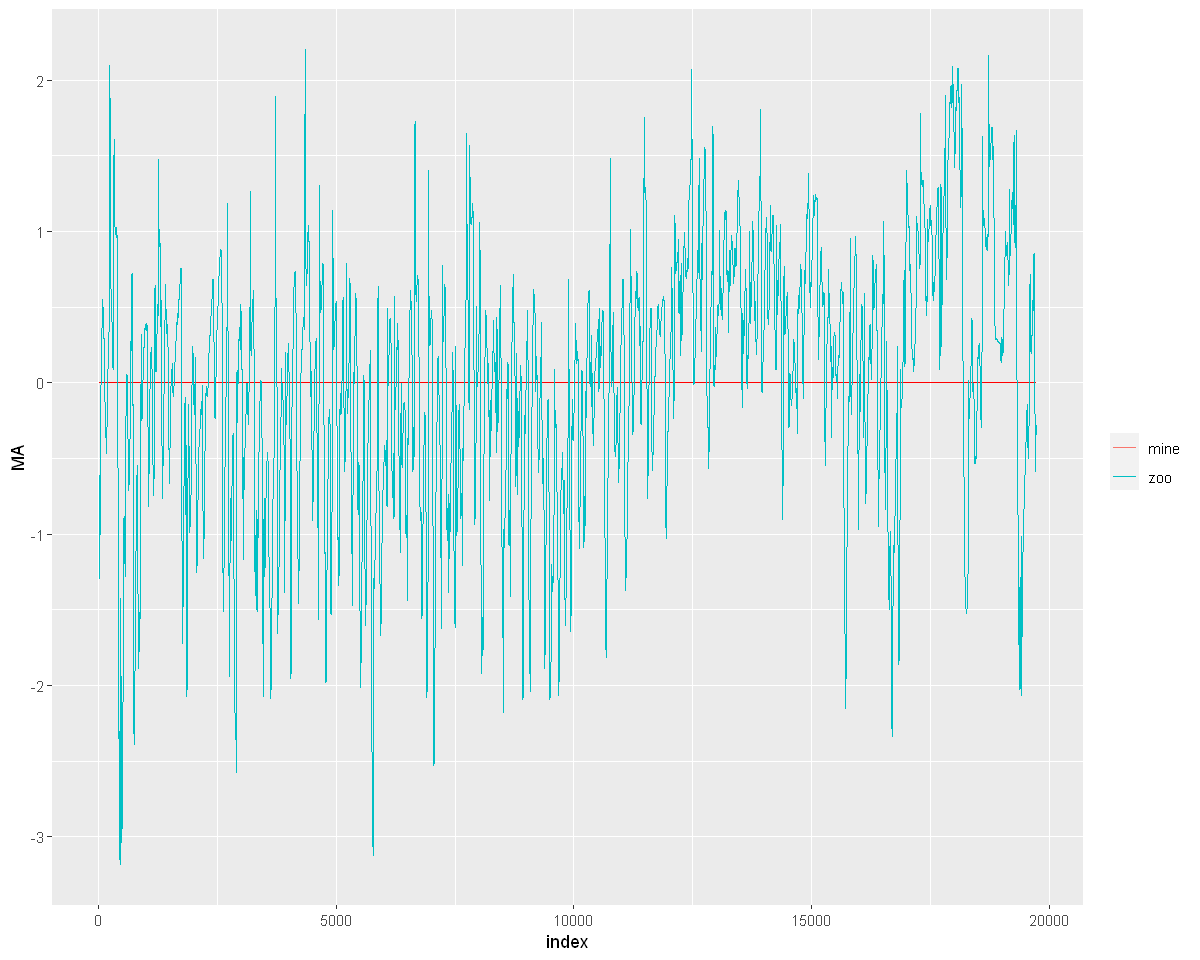

In [409]:
##moving average
vals11 <- ruchoma(e, 11)
x11 <- seq((length(e)-length(vals11))/2 +1 , length(vals11) +(length(e)-length(vals11))/2)
ggplot() + geom_line(aes(x11, vals11, color="mine")) + geom_line(aes(x11, x11*0), color="red") +labs(x="index",y="MA") + 
geom_line(aes(x11, rollmean(e, 11), color="zoo")) + theme(legend.title = element_blank()) 

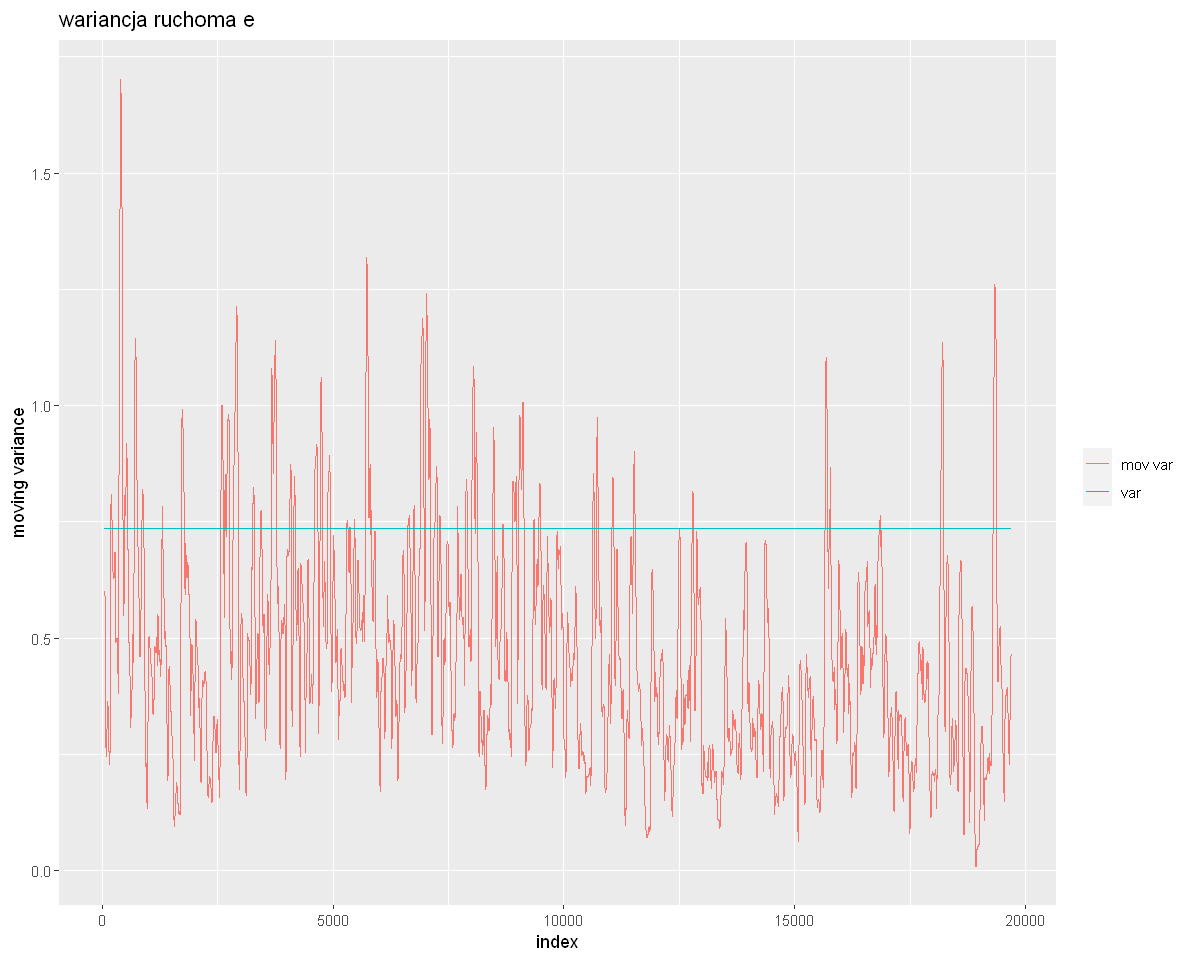

In [410]:
##moving variance
val <- rep(var(e),)
ggplot() + geom_line(aes(x101, rollapply(e, width = 101, FUN = sd), color="mov var")) + 
geom_line(aes(x101, rep(var(e), length(x101)), color="var")) +
labs(x="index",y="moving variance") + ggtitle("wariancja ruchoma e") + theme(legend.title = element_blank()) 

średnia tak średnio wyszła (hehe), jest powyzej 0 od pewnego momentu, ale overall wychodzi blisko 0<br>
wariancja też taka prawie stała, ale nie do konca, srednia wyszła inna niz by to wynikało z wykresu

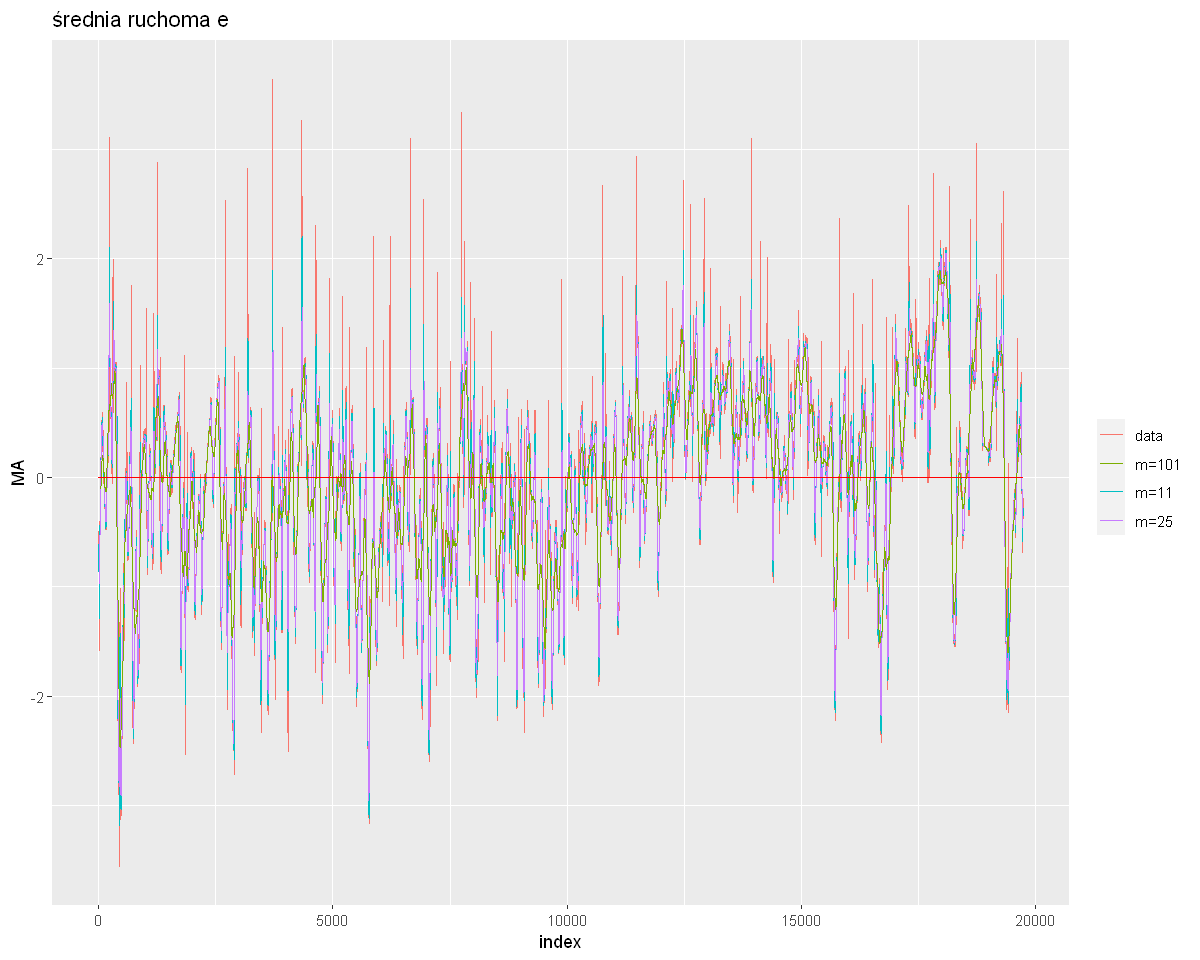

In [411]:
vals11 <- ruchoma(e, 11)
x11 <- seq((n-length(vals11))/2 +1 , length(vals11) +(n-length(vals11))/2)

vals101 <- ruchoma(e, 101)
x101 <- seq((n-length(vals101))/2 +1 , length(vals101) +(n-length(vals101))/2)

vals25 <- ruchoma(e, 25)
x25 <- seq((n-length(vals25))/2 +1 , length(vals25) +(n-length(vals25))/2)

xs <- seq(1, length(e), 1)
ggplot() + geom_line(aes(xs, e, color="data")) +
geom_line(aes(x11, vals11, color="m=11")) + geom_line(aes(x25, vals25, color="m=25")) + 
geom_line(aes(x101, vals101, color="m=101")) + geom_line(aes(x11, x11*0), color="red") +
labs(x="index",y="MA") + ggtitle("średnia ruchoma e") + theme(legend.title = element_blank()) 



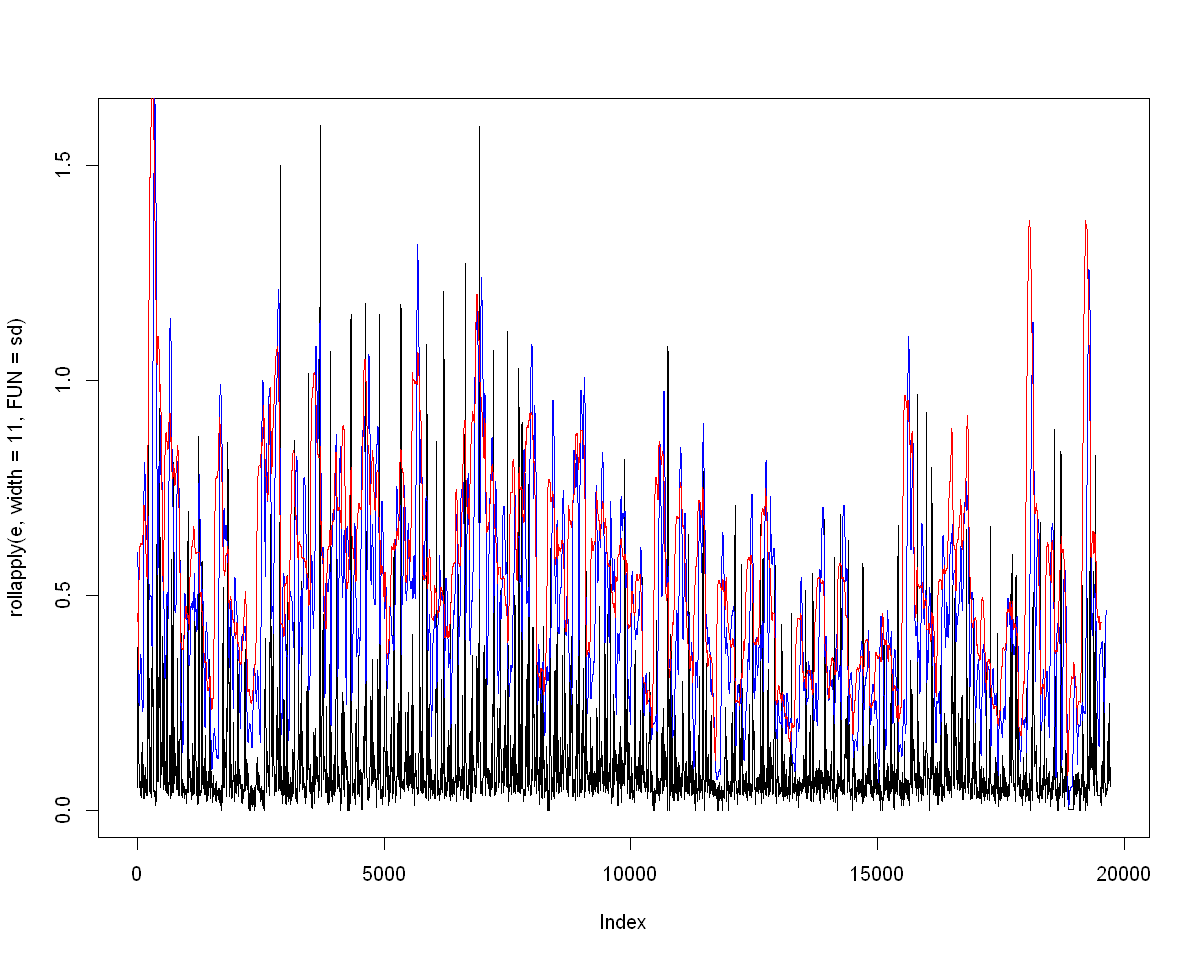

In [412]:
plot(rollapply(e, width = 11, FUN = sd), type="l")
lines(rollapply(e, width = 101, FUN = sd), col ="blue")
lines(rollapply(e, width = 201, FUN = sd), col ="red")

## KOŁMOGOROW - SMIRNOW

In [413]:
##test kołmogorowa-smirnowa
ks.test((e-mean(e))/sqrt(var(e)), "pnorm")

Warning message in ks.test.default((e - mean(e))/sqrt(var(e)), "pnorm"):
"wartości powtórzone nie powinny być obecne w teście Kolmogorowa-Smirnowa"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  (e - mean(e))/sqrt(var(e))
D = 0.053442, p-value < 2.2e-16
alternative hypothesis: two-sided


p-value < 0.05 wiec odrzucamy hipotezę zerową, czyli nie możemy stwierdzić, że $e \sim \mathcal{N}(0,\sigma^2)$. Pochodzi z jakiegoś innego rozkładu

## BOXPLOT

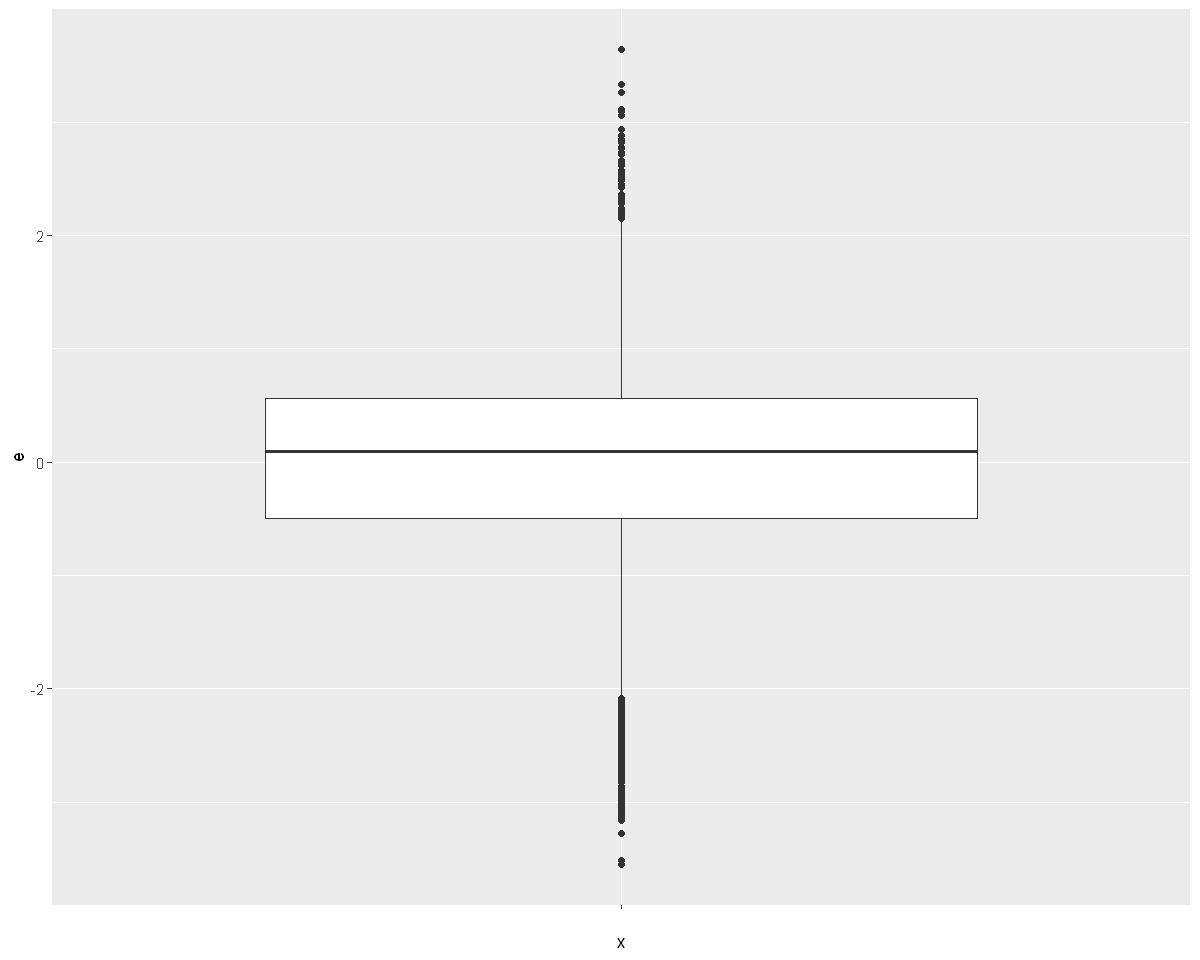

In [414]:
ggplot() + geom_boxplot(aes(x="", y=e))

## autokorelacja

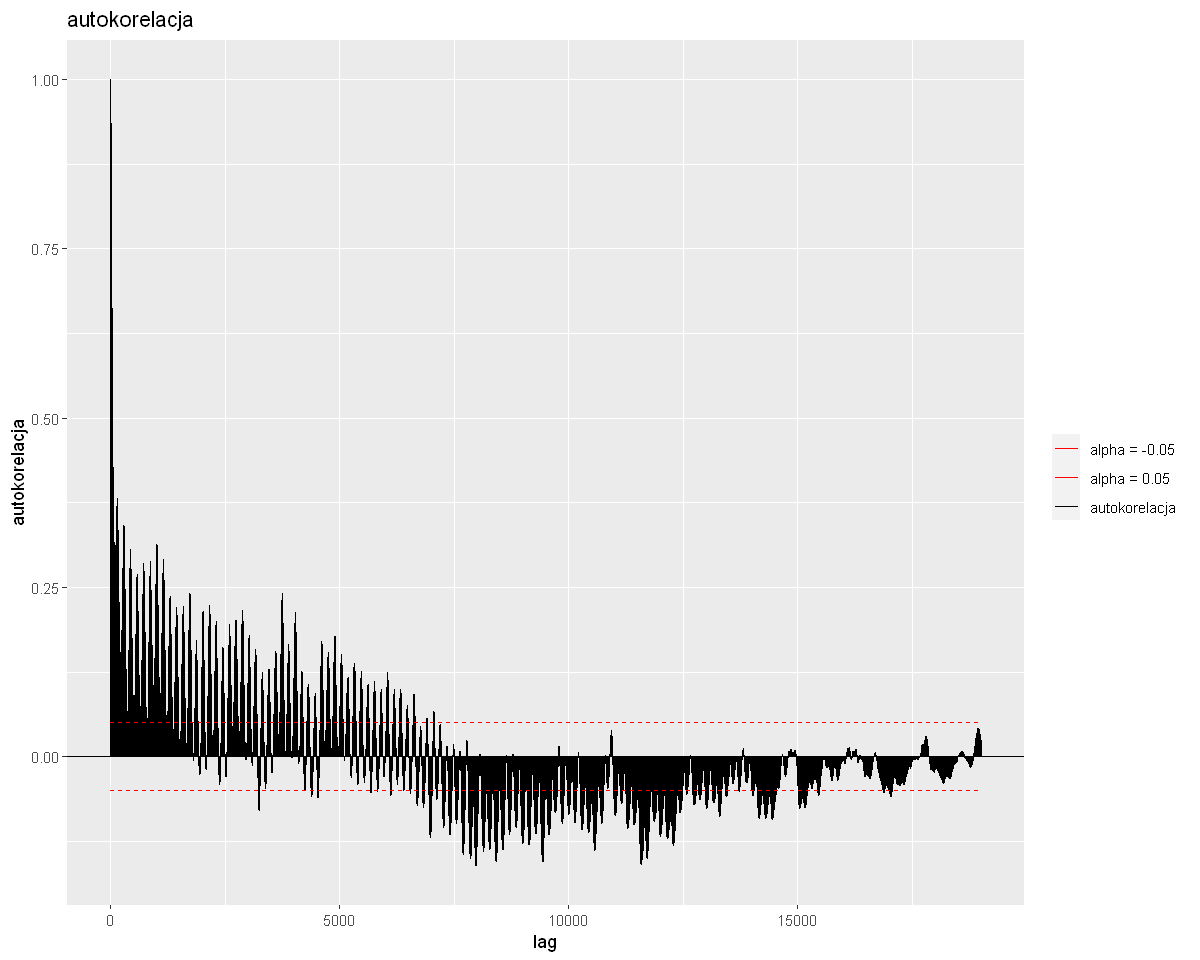

In [416]:
conf.level <- 0.95
ciline <- qnorm((1 - conf.level)/2)/sqrt(length(e))
bacf <- acf(e, 19000 , plot = FALSE)
bacfdf <- with(bacf, data.frame(lag, acf))
xs <- seq(0,19000,1)
l1 <- rep(0.05, length(xs))
l2 <- rep(-0.05, length(xs))

q <- ggplot(data = bacfdf, mapping = aes(x = lag, y = acf)) +
       geom_hline(aes(yintercept = 0)) +
       geom_segment(mapping = aes(xend = lag, yend = 0, color="autokorelacja")) + geom_line(aes(xs,l1, color="alpha = 0.05"), linetype = "dashed") +
geom_line(aes(xs,l2, color="alpha = -0.05"), linetype = "dashed") + theme(legend.title = element_blank()) + 
ggtitle("autokorelacja") + labs(x="lag", y="autokorelacja") +  scale_colour_manual(values = c("red", "red", "black"))
q